#Getting and cleaning the data

In [394]:
%matplotlib inline

import random
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import metrics
from numpy import random
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [395]:
#file is located under ds/DS_HK_5
df_large = pd.read_csv('projectDF.csv')

In [396]:
df_large.head(3)

,entry,exit,ticker,ep_ratio,fwd_ep,egp_ratio,fwd_egp,eps_growth,bp_ratio,div_yield,...,stk_1m_chg,idx_1m_chg,stk_idx_1m_chg,ma_20_50,ma_20_200ma,px_200md,news_stories,news_readership,stock_ret,rel_ret
0,37229,37278,1 HK Equity,0.345175,0,0,0,0,0,2.0447,...,18.1,12.2,5.9,110.0823045,94.92427603,99.16988784,0,0,-0.03,0.03
1,37253,37302,1 HK Equity,0.334490,0,0,0,0,0,1.9814,...,8.8,3.3,5.5,107.4825831,103.1335369,103.8084525,0,0,-0.11,-0.06
2,37778,37827,1 HK Equity,0.758265,0,0,0,0,0,3.2258,...,15.8,9.1,6.8,104.7543119,93.07722546,98.97374602,0,0,0.01,-0.02


In [397]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5349
Data columns (total 37 columns):
entry                5350 non-null int64
exit                 5350 non-null object
ticker               5350 non-null object
ep_ratio             5350 non-null float64
fwd_ep               5350 non-null float64
egp_ratio            5350 non-null float64
fwd_egp              5350 non-null float64
eps_growth           5350 non-null object
bp_ratio             5350 non-null float64
div_yield            5350 non-null float64
beta                 5343 non-null float64
vol_adv              5350 non-null float64
marketcap            5186 non-null float64
days_since_result    5350 non-null object
last_rating_up       5350 non-null object
last_rating_down     5350 non-null object
last_tp_up           5350 non-null object
last_tp_down         5350 non-null object
tp_upside            5350 non-null object
ana_rating           5350 non-null float64
rsi_14               5171 non-null float64
r

In [398]:
col_list = df_large.columns
type(col_list)

pandas.core.index.Index

In [407]:
#there are too many variable. Some you know already will not be useful
df = df_large.drop(['exit', 'ticker'], 1)

#clean the data set, turn any non float values into NaN so it can be dropped later
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return NaN

df = df.applymap(is_number)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5349
Data columns (total 35 columns):
entry                5350 non-null float64
ep_ratio             5350 non-null float64
fwd_ep               5350 non-null float64
egp_ratio            5350 non-null float64
fwd_egp              5350 non-null float64
eps_growth           5325 non-null float64
bp_ratio             5350 non-null float64
div_yield            5350 non-null float64
beta                 5343 non-null float64
vol_adv              5350 non-null float64
marketcap            5186 non-null float64
days_since_result    5197 non-null float64
last_rating_up       4973 non-null float64
last_rating_down     4889 non-null float64
last_tp_up           4525 non-null float64
last_tp_down         4464 non-null float64
tp_upside            1361 non-null float64
ana_rating           5350 non-null float64
rsi_14               5171 non-null float64
rsi_30               5154 non-null float64
volat_10_30          5160 non-nul

In [409]:
#tp_upside has too many values, drop that column
df = df.drop(['tp_upside'], 1)

#dropping all the rows with NaN

#df = df.dropna(subset = ['stock_ret'])
#df = df.dropna(subset = ['rel_ret'])
df = df.dropna()

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 21 to 5348
Data columns (total 34 columns):
entry                3677 non-null float64
ep_ratio             3677 non-null float64
fwd_ep               3677 non-null float64
egp_ratio            3677 non-null float64
fwd_egp              3677 non-null float64
eps_growth           3677 non-null float64
bp_ratio             3677 non-null float64
div_yield            3677 non-null float64
beta                 3677 non-null float64
vol_adv              3677 non-null float64
marketcap            3677 non-null float64
days_since_result    3677 non-null float64
last_rating_up       3677 non-null float64
last_rating_down     3677 non-null float64
last_tp_up           3677 non-null float64
last_tp_down         3677 non-null float64
ana_rating           3677 non-null float64
rsi_14               3677 non-null float64
rsi_30               3677 non-null float64
volat_10_30          3677 non-null float64
volat_10_60          3677 non-nu

###Important: How do you define a successful breakout?

In [458]:
#Define when a successful breakout has occured

df['success_stock'] = df['stock_ret'] > 0.05
df.success_stock = df.success_stock.astype('int')
print 'success_stock breakdown'
print df['success_stock'].value_counts()
print 'ratio = ' + str(df.success_stock[df.success_stock == 1].sum() /  float(len(df.index)))
print '\n'

df['success_rel'] = df['rel_ret'] > 0.02
df.success_rel = df.success_rel.astype('int')
print 'success_relative breakdown'
print df['success_rel'].value_counts()
print 'ratio = ' + str(df.success_rel[df.success_rel == 1].sum() /  float(len(df.index)))

dfY = df.ix[: , -2:-1]
dfY.describe()

success_stock breakdown
0    2308
1    1369
dtype: int64
ratio = 0.372314386728


success_relative breakdown
0    2158
1    1519
dtype: int64
ratio = 0.413108512374


,success_stock
count,3677.000000
mean,0.372314
std,0.483487
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Expected return without any optmization
#####  stock return 3.23%, stdev 12.2% 
##### relative return 1.74%, stdev 10.2%

##### data set is now clean, we have 3677 samples to play with

#2. EDA

In [459]:
#32 useful X variables to check with pair plot. Seperate them into 4's for easy reading
len(df.columns)

36

In [460]:
rngstart = range(0,28,4)
rngend = range(4,32,4)

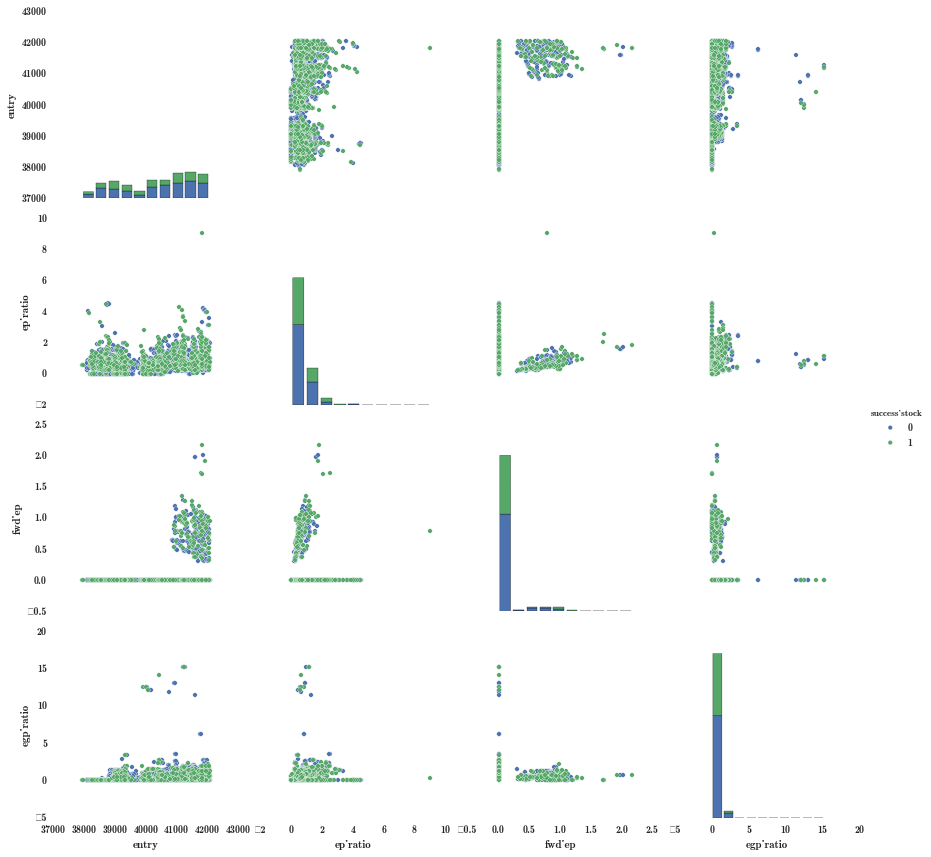

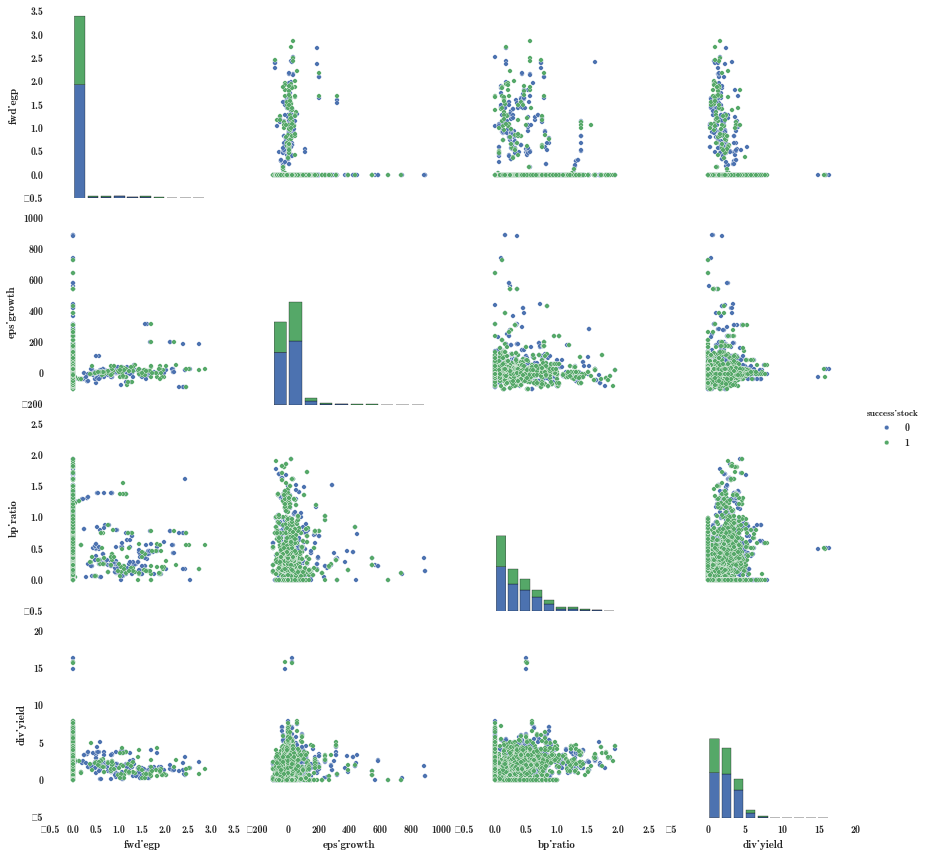

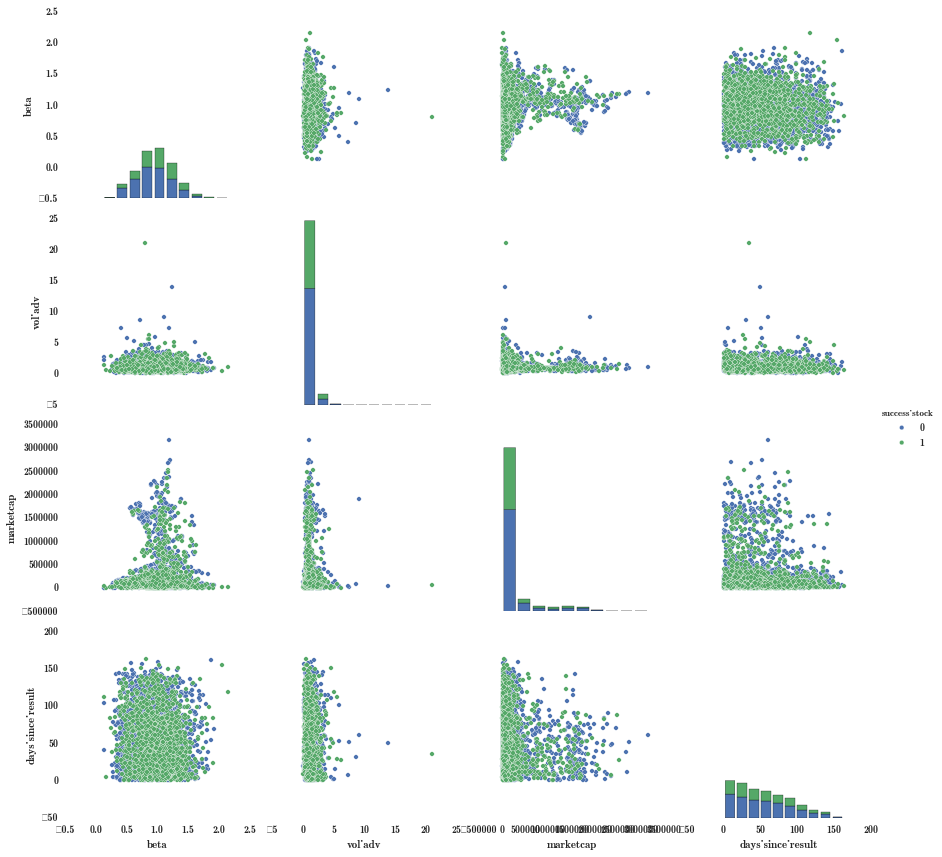

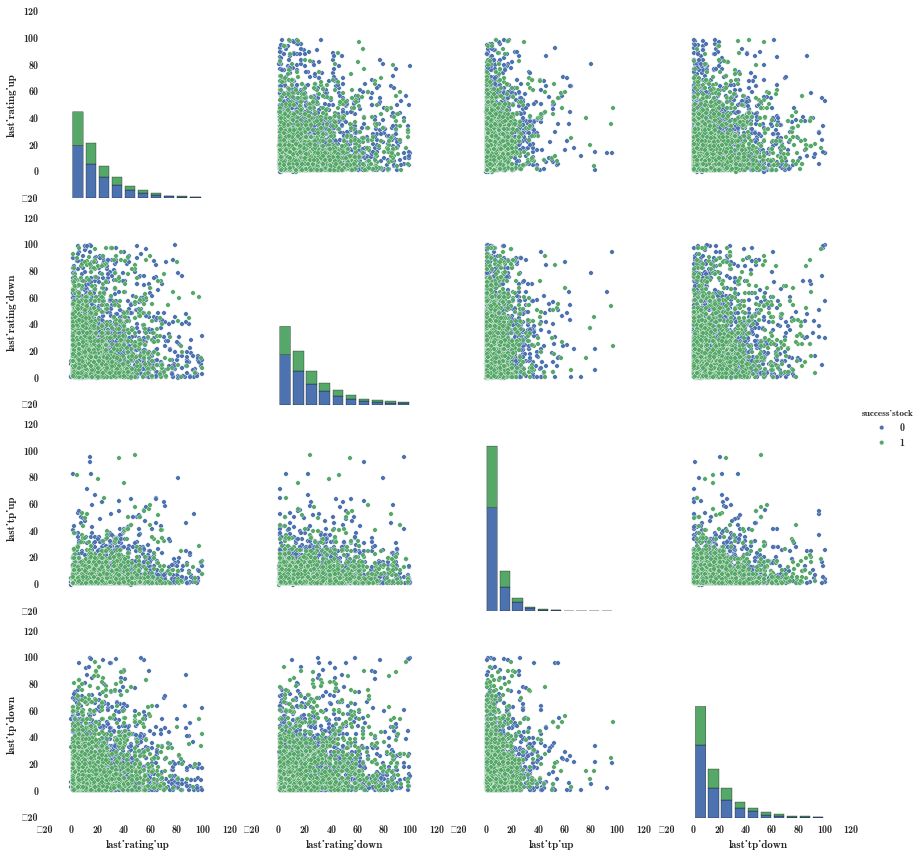

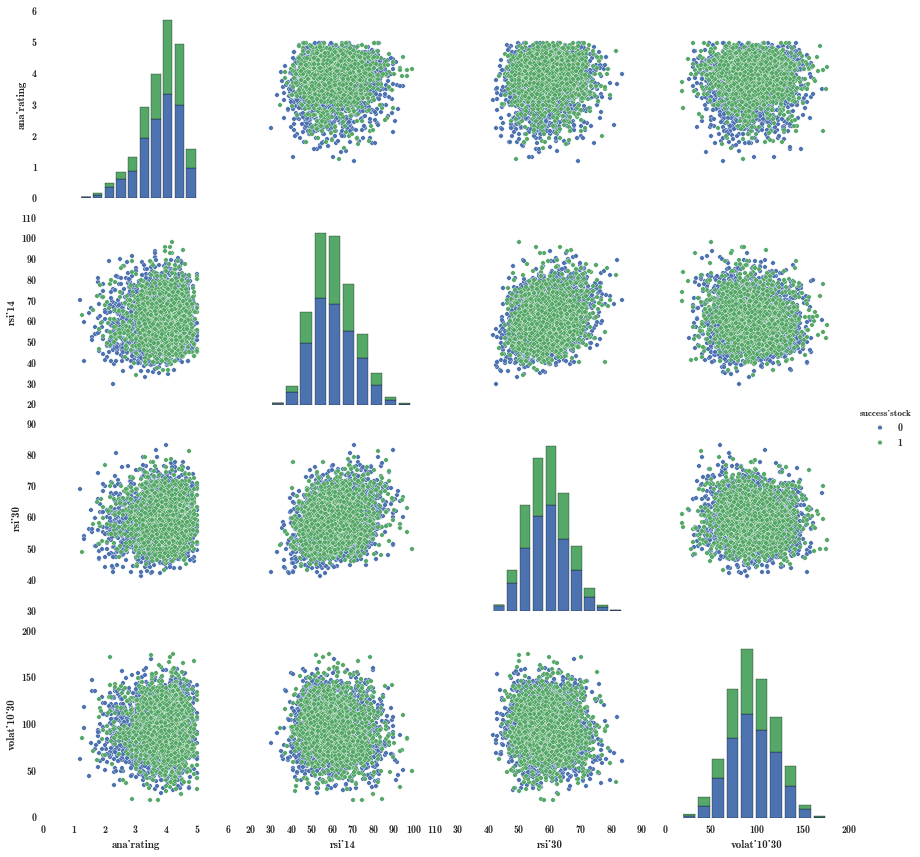

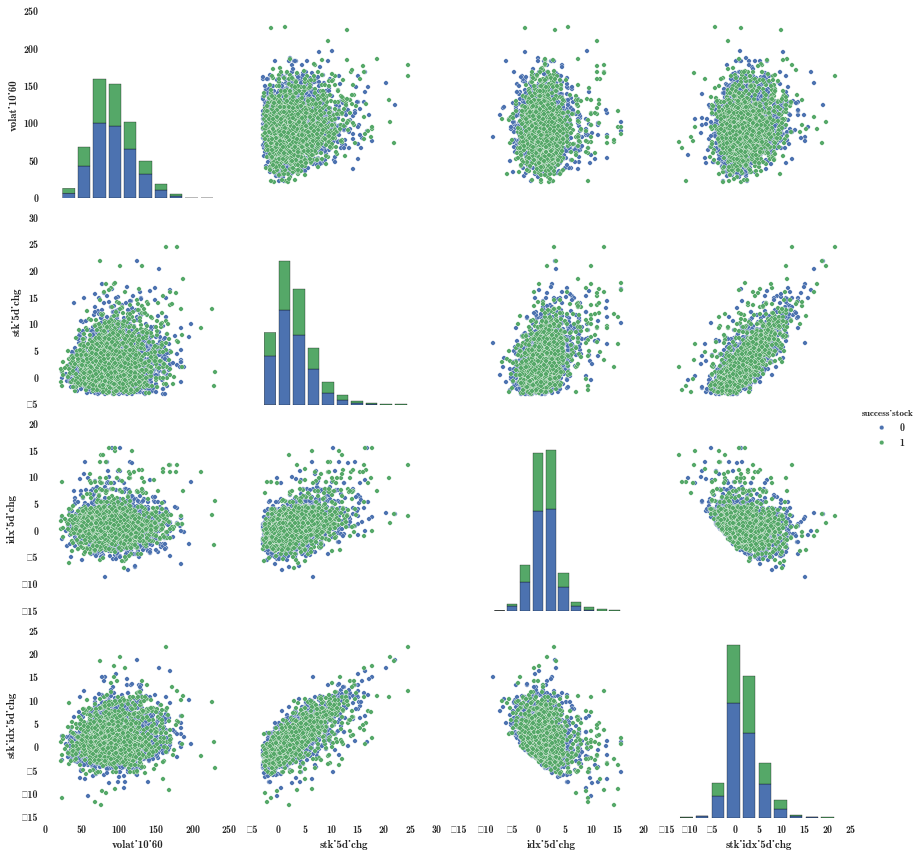

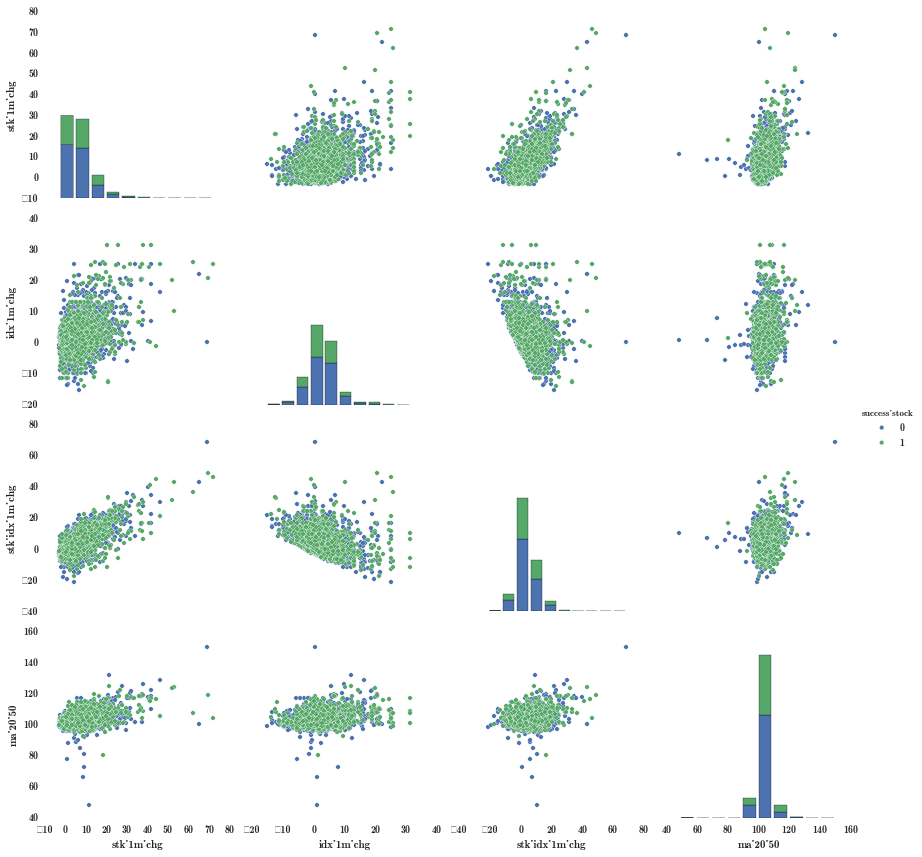

In [461]:
#Plotting out pairs 4 at a time
for x in range(len(rngstart)):
    dftest = pd.concat([df.ix[:,rngstart[x]:rngend[x]],dfY['success_stock']], axis =1)
    dftest = dftest.dropna()
    col_ = dftest.ix[:,0:4].columns    #don't do pair plot on Y column
    print sns.pairplot(dftest, hue='success_stock', vars=col_)

#####Successful breakouts are less dispersed. Even if precision is not high. It is possible to improve the odds of finding a successful breakout.

# Building classifier

In [475]:
dfX = df.ix[:, 1:-4]
print len(dfX.columns)
dfX.columns

31


Index([u'ep_ratio', u'fwd_ep', u'egp_ratio', u'fwd_egp', u'eps_growth', u'bp_ratio', u'div_yield', u'beta', u'vol_adv', u'marketcap', u'days_since_result', u'last_rating_up', u'last_rating_down', u'last_tp_up', u'last_tp_down', u'ana_rating', u'rsi_14', u'rsi_30', u'volat_10_30', u'volat_10_60', u'stk_5d_chg', u'idx_5d_chg', u'stk_idx_5d_chg', u'stk_1m_chg', u'idx_1m_chg', u'stk_idx_1m_chg', u'ma_20_50', u'ma_20_200ma', u'px_200md', u'news_stories', u'news_readership'], dtype='object')

In [464]:
dfY.describe()

,success_stock
count,3677.000000
mean,0.372314
std,0.483487
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [465]:
#Splitting data into training and test data

idx = np.random.uniform(0, 1, len(df.index)) >= 0.3

xtrain, xtest = dfX[idx], dfX[idx==False]
ytrain, ytest = dfY[idx], dfY[idx==False]

#or actually could have used this...

#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                        test_size=0.30,
#                                        random_state=10)

In [466]:
from IPython.display import display as dump

from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [467]:
#check again both data do not have NaN
print np.where(np.isnan(ytrain))
print np.where(np.isnan(xtrain))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [488]:
ytrain2 = ytrain['success_stock']
ytrain2.shape

(2543,)

In [508]:
xtrain.shape[1]

31

In [509]:
num_vol  = xtrain.shape[1]

## DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= num_vol, min_samples_split=1)
scores = cross_val_score(clf, xtrain, ytrain2, cv=10)
print "DecisionTreeClassifier:", scores.mean()

## RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth= num_vol, min_samples_split=1)
scores = cross_val_score(clf, xtrain, ytrain2, cv = 10)
print "RandomForestClassifier:", scores.mean()

## ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, max_depth=num_vol, min_samples_split=1)
scores = cross_val_score(clf, xtrain, ytrain2, cv = 10)
print "ExtraTreesClassifier:  ", scores.mean()

DecisionTreeClassifier: 0.529714630242
RandomForestClassifier: 0.619324420067
ExtraTreesClassifier:   0.616204258181


#### Decent result. Let's see if it improves after scaling the variables and applying PCA.

In [506]:
#rf = Pipeline([("scale", StandardScaler()),
#               ("rf", RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=2))])


## RandomForestClassifier
rf = Pipeline([("scale", StandardScaler()), ("rf", RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=1))])
scores = cross_val_score(rf, xtrain, ytrain2, cv = 10)
print "rf:", scores.mean()




#("scale", StandardScaler()),
#estimators = [('imputer', PCA()), ('svm', SVC())]


#clf = Pipeline([ ("rf", RandomForestClassifier(n_estimators=1, max_depth=None, min_samples_split=1 ))])
#scores = cross_val_score(clf, xtrain, ytrain)
#print "RandomForestClassifier:", scores

rf: 0.60358392512
